# 字符分割
### 参考："Detecting the Car Number Plate Using Segmentation" V. Lakshmi Priya 1, K. Perumal2, https://pdfs.semanticscholar.org/5ef1/9f9fad5d79119db9de8942a00b5197e5383a.pdf

In [1]:
import skimage.io as io
import skimage.color as color
import skimage.morphology as morphology
import skimage.feature as feature
import skimage.measure as measure
import numpy as np
import math
import sys
import os
import skimage

ROOT_DIR = os.path.abspath(r"F:\Alex\LLPR\lao-license-plate-using-mask-rcnn")
sys.path.append(ROOT_DIR)

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:

img = skimage.io.imread('6.jpg')

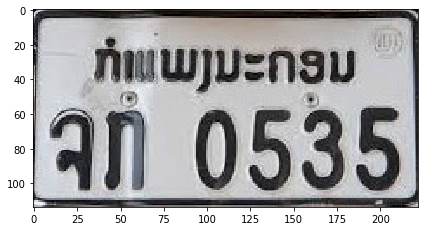

In [4]:
io.imshow(img)

# 1. 转换为灰度图像

In [5]:
img2 = color.rgb2gray(img)

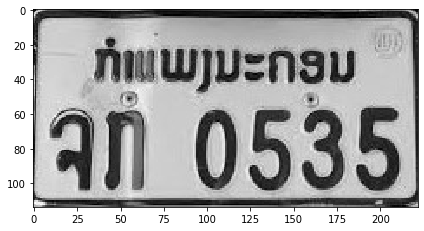

In [6]:
io.imshow(img2)

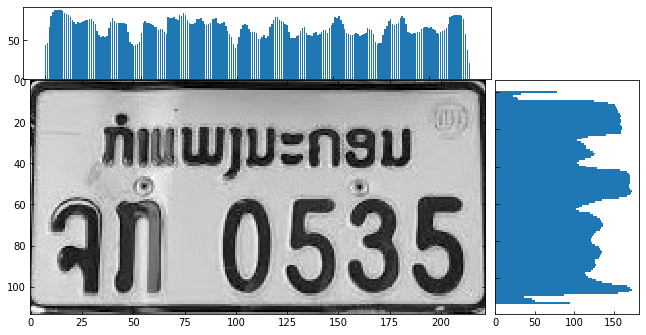

In [16]:
#fig, ax 
#img2.sum(axis=0)




# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_img = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]



# start with a rectangular Figure
plt.figure(figsize=(10, 5))

ax_img = plt.axes(rect_img)
ax_img.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

ax_img.imshow(img2, cmap="gray")
ax_histx.bar(list(range(img2.shape[1])), img2.sum(axis=0))
ax_histy.bar(None, bottom=list(range(img2.shape[0])), height=1, width=img2.sum(axis=1), orientation='horizontal')
ax_histy.invert_yaxis()

plt.show()

# 2. Canny边缘检测并膨胀

In [7]:
img3 = feature.canny(img2, sigma=3)

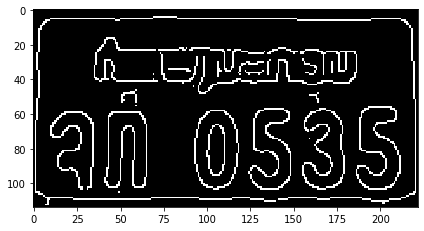

In [8]:
io.imshow(img3)

In [9]:
img4 = morphology.dilation(img3)

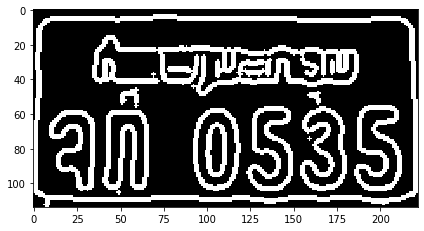

In [10]:
io.imshow(img4)

# 3. 标记并筛选区域

In [11]:
label_img = measure.label(img4)
regions = measure.regionprops(label_img)

79.953125
80.54108216432866
80.95705521472392
80.46176470588236
78.46501128668172
81.23498233215548


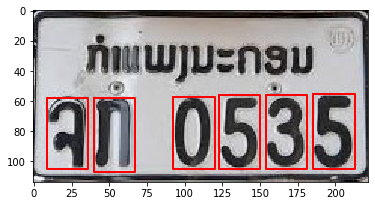

In [22]:
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)

def in_bboxes(bbox, bboxes):
    for bb in bboxes:
        minr0, minc0, maxr0, maxc0 = bb
        minr1, minc1, maxr1, maxc1 = bbox
        if minr1 >= minr0 and maxr1 <= maxr0 and minc1 >= minc0 and maxc1 <= maxc0:
            return True
    return False

bboxes = []
for props in regions:
    y0, x0 = props.centroid
    minr, minc, maxr, maxc = props.bbox
    
    if maxc - minc > img4.shape[1] / 6 or maxr - minr < img4.shape[0] / 3:
        continue
        
    bbox = [minr, minc, maxr, maxc]
    if in_bboxes(bbox, bboxes):
        continue
        
    if abs(y0 - img4.shape[0] / 2) > img4.shape[0] / 4:
        continue
        
    bboxes.append(bbox)
    
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-r', linewidth=2)
    print(y0)

# แสดงขอบเขตทั้งหมดที่ตรวจพบ

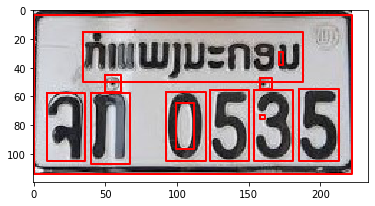

In [12]:
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)

def in_bboxes(bbox, bboxes):
    for bb in bboxes:
        minr0, minc0, maxr0, maxc0 = bb
        minr1, minc1, maxr1, maxc1 = bbox
        if minr1 >= minr0 and maxr1 <= maxr0 and minc1 >= minc0 and maxc1 <= maxc0:
            return True
    return False

bboxes = []
for props in regions:
    y0, x0 = props.centroid
    minr, minc, maxr, maxc = props.bbox
    
    #if maxc - minc > img4.shape[1] / 6 or maxr - minr < img4.shape[0] / 3:
    #    continue
        
    bbox = [minr, minc, maxr, maxc]
    #if in_bboxes(bbox, bboxes):
    #    continue
        
    #if abs(y0 - img4.shape[0] / 2) > img4.shape[0] / 4:
    #    continue
        
    bboxes.append(bbox)
    
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-r', linewidth=2)


# 3.1. หาบริเวณที่มีอักษร(และตัวเลข) และชื่อจังหวัด

char_lim:  [38.0, 76.0, 22.200000000000003, 37.0]
prov_lim:  [28.5, 57.0, 55.5, 194.25]
props_w: 222, props_h: 111, y0: 57.65608465608466, x0: 109.9095238095238
False False
props_w: 154, props_h: 35, y0: 32.32693426410704, x0: 112.51192553810355
False True
props_w: 3, props_h: 9, y0: 33.0, x0: 172.0
False False
props_w: 11, props_h: 12, y0: 49.83076923076923, x0: 55.56923076923077
False False
props_w: 8, props_h: 8, y0: 49.96875, x0: 162.375
False False
props_w: 28, props_h: 50, y0: 79.953125, x0: 198.541015625
True False
props_w: 27, props_h: 49, y0: 80.54108216432866, x0: 136.70541082164328
True False
props_w: 27, props_h: 49, y0: 80.95705521472392, x0: 167.57668711656441
True False
props_w: 28, props_h: 48, y0: 80.46176470588236, x0: 105.26176470588236
True False
props_w: 27, props_h: 47, y0: 78.46501128668172, x0: 24.209932279909708
True False
props_w: 27, props_h: 49, y0: 81.23498233215548, x0: 53.64134275618375
True False
props_w: 13, props_h: 32, y0: 80.8274111675127, x0: 105.38

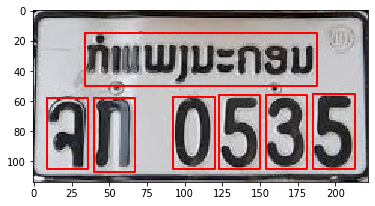

In [13]:
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)

def in_bboxes(bbox, bboxes):
    for bb in bboxes:
        minr0, minc0, maxr0, maxc0 = bb
        minr1, minc1, maxr1, maxc1 = bbox
        if minr1 >= minr0 and maxr1 <= maxr0 and minc1 >= minc0 and maxc1 <= maxc0:
            return True
    return False

plate_h, plate_w = img4.shape
## h_min, h_max, w_min, w_max
char_lim = [plate_h*(1/3), plate_h*(2/3), plate_w*(1/10), plate_w*(1/6)]
prov_lim = [plate_h*(1/4), plate_h*(1/2), plate_w*(2/8), plate_w*(7/8)]

print('char_lim: ', char_lim)
print('prov_lim: ', prov_lim)

bboxes = []
for props in regions:
    y0, x0 = props.centroid
    minr, minc, maxr, maxc = props.bbox
    props_w = maxc - minc
    props_h = maxr - minr
    print(F'props_w: {props_w}, props_h: {props_h}, y0: {y0}, x0: {x0}')
    
#    if maxc - minc > img4.shape[1] / 6 or maxr - minr < img4.shape[0] / 3:
#        continue
    found_char = False
    found_prov = False

    # character on lower half.
    if props_h>char_lim[0] and props_h<char_lim[1] and props_w>char_lim[2] and props_w<char_lim[3] and y0>plate_h/2:
        found_char = True
    
    # province on upper half.
    if props_h>prov_lim[0] and props_h<prov_lim[1] and props_w>prov_lim[2] and props_w<prov_lim[3] and y0<plate_h/2:
        found_prov = True
        
    print(found_char, found_prov)
    if not (found_char or found_prov):
        continue
    
    bbox = [minr, minc, maxr, maxc]
    if in_bboxes(bbox, bboxes):
        continue
        
    if abs(y0 - img4.shape[0] / 2) > img4.shape[0] / 4:
        continue
        
    bboxes.append(bbox)
    
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-r', linewidth=2)

# 4. 提取单个字符图像

In [14]:
bboxes = sorted(bboxes, key=lambda x: x[1])

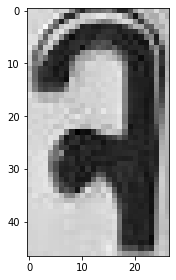

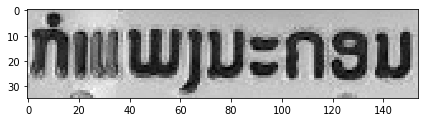

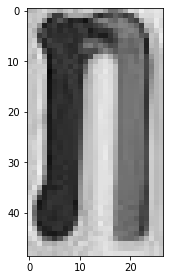

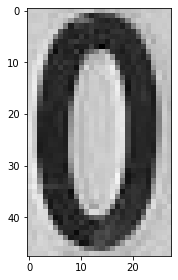

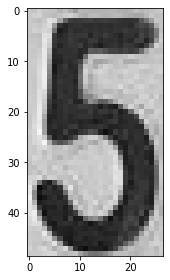

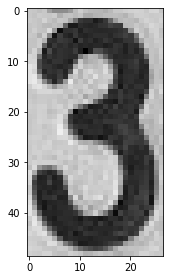

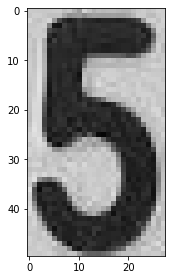

In [15]:
chars = []
for bbox in bboxes:
    minr, minc, maxr, maxc = bbox
    ch = img2[minr:maxr, minc:maxc]
    chars.append(ch)
    io.imshow(ch)
    plt.show()